https://www.kaggle.com/neuromusic/avocado-prices#avocado.csv

# Práctica PROPHET
Bienvenido a la práctica con PROPHET, aquí veremos algunos de los principales aspectos de esta librería de facebook.

Utilizaremos una base de datos de la venta de aguacate :)
![img](https://ichef.bbci.co.uk/news/800/cpsprodpb/80C6/production/_102166923_gettyimages-694087276.jpg)

In [ ]:
#En google colab ya trae la librería pero en caso de que lo uses en tu computadora instalaras lo siguiente
#!pip install fbprophet

# Instalacion prophet

Como instalar prophet

1. Abrir anaconda prompt o la terminal del enviroment (Anaconda navigator-seleccionar entorno- abrir terminal)
2. Activamos el entorno en caso de que no este activo

```conda activate SQLenv ```
3. Necesitaremos tambien la librerìa plotly para graficar

```pip install plotly```

4. Librerias necesarias para prophet
  * Ephem

  ```conda install -c anaconda ephem```
  * Pystan

  ```conda install -c conda-forge pystan```

  * Fbprophet
  
  ```conda install -c conda-forge fbprophet```

**EXTRA en caso de error en Holidays**

Prophet instalara varios paquetes si te llega marcar un error en el paquete holidays lo puedes solucionar con el siguiente comando:

```pip install holidays==0.9.12```






# Exploraremos los datos:

In [ ]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py
import seaborn as sns
py.init_notebook_mode()
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/test/main/data/avocado.csv"
dataset= pd.read_csv(url)

In [ ]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Acomodamos los datos por fecha 

In [ ]:
df1 = dataset.sort_values("Date")
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [ ]:
df1[df1['region']=='Chicago']

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
467,51,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
9592,50,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
466,50,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
465,49,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,2,2018-03-11,1.54,830421.03,95041.64,454041.33,142564.10,138773.96,100438.58,37184.96,1150.42,conventional,2018,Chicago
17698,1,2018-03-18,1.66,35542.17,184.53,26955.74,0.00,8401.90,8398.57,3.33,0.00,organic,2018,Chicago
8575,1,2018-03-18,1.42,841171.24,85185.29,435552.05,174149.72,146284.18,110035.76,34764.91,1483.51,conventional,2018,Chicago
17697,0,2018-03-25,1.69,35088.36,324.87,27550.29,0.00,7213.20,7176.54,36.66,0.00,organic,2018,Chicago


In [ ]:
#fecha min y fecha max
print("Fecha min",df1['Date'].min() )
print("Fecha Max",df1['Date'].max() )

Fecha min 2015-01-04
Fecha Max 2018-03-25


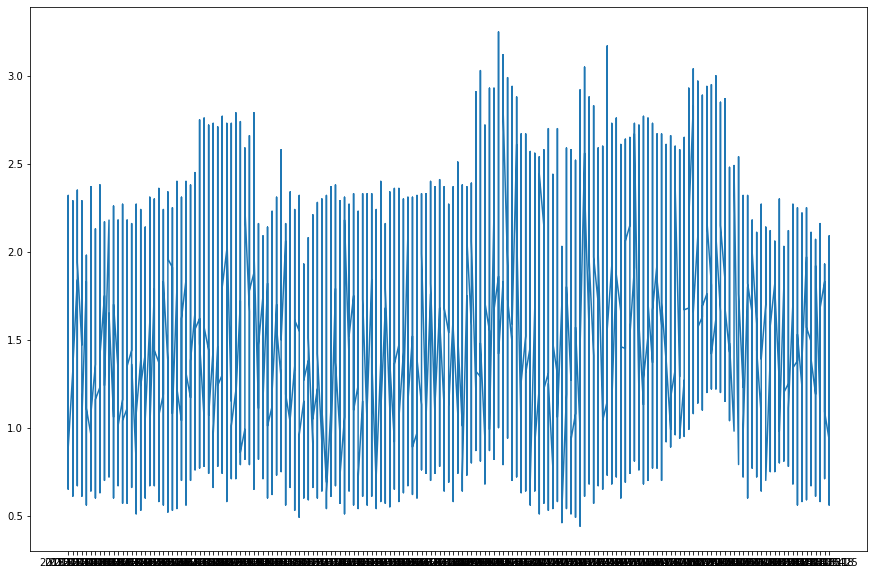

In [ ]:
#graficamos la serie de tiempo conforme al promedio del precio del aguacate
plt.figure(figsize=(15,10))
plt.plot(df1['Date'],df1['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

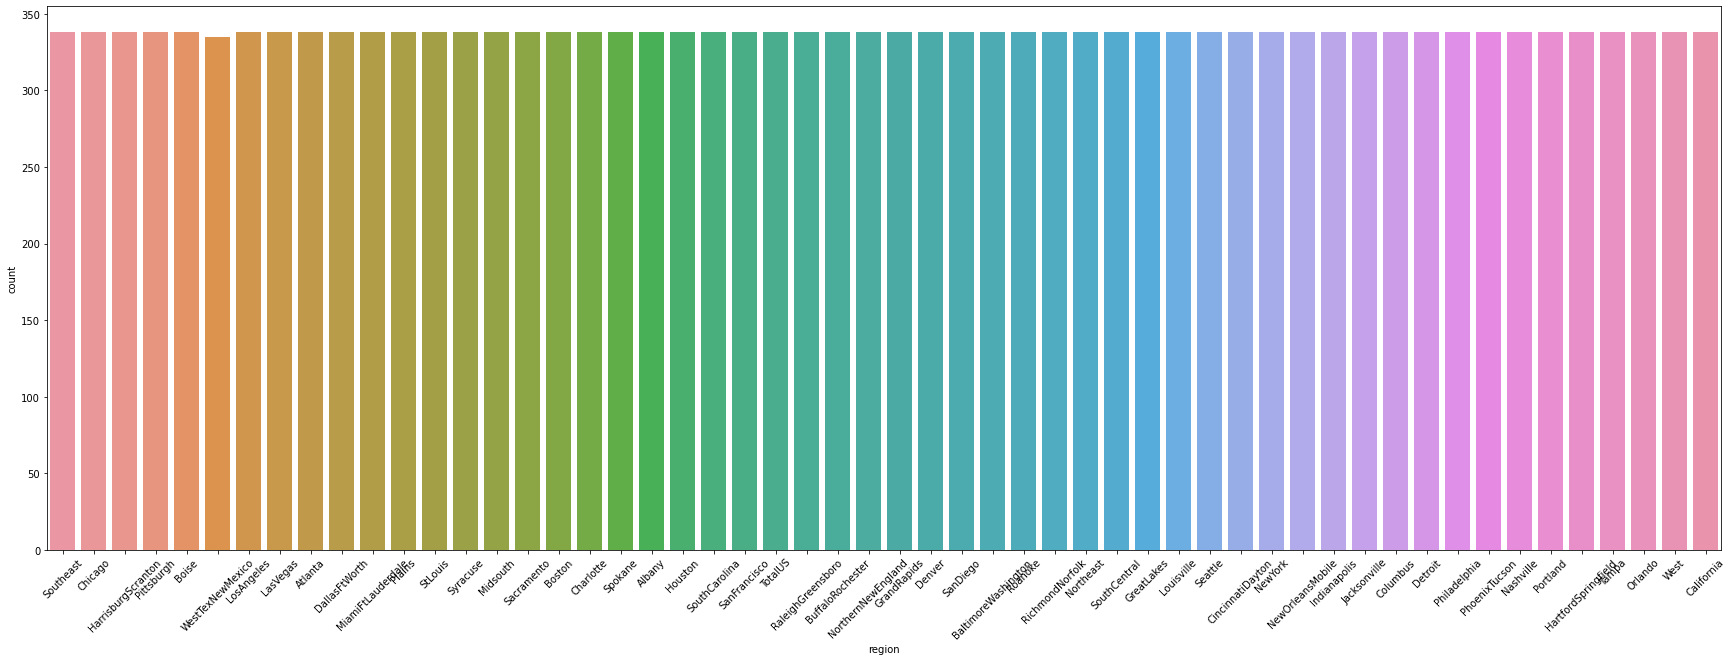

In [ ]:
#verificamos la distribución de los datos
plt.figure(figsize=(30,10))
sns.countplot(x='region',data=df1)
plt.xticks(rotation=45)

Podemos observar que es una base de datos balanceada.

Observaremos la cantidad de registros por año.

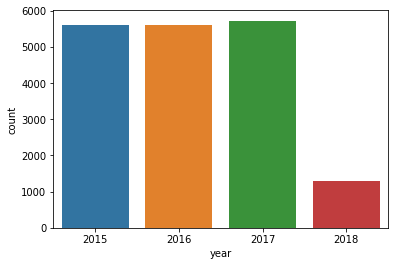

In [ ]:
sns.countplot(x='year',data=df1)

Despues de haber hecho una exploración de los datos ahora si a trabajar con prophet. Para ello, necesitamos seleccionar la fecha y el campo de nuestro interes. En este caso el promedio del precio del aguacate :)

In [ ]:
df1 = df1[['Date','AveragePrice']]
df1

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [ ]:
#cambiamos el nombre de las columnas
df1.columns = ['ds','y']
df1.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# Predicción con Prophet

In [ ]:
m = Prophet()
m.fit(df1)
#predecimos un año adelante
future = m.make_future_dataframe(periods=365)
#El data frame toma en cuenta la última fecha así que si la ultima fue 25/3/2018 entonces el futuro será hasta 25/3/2019
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          534 non-null    datetime64[ns]
 1   trend                       534 non-null    float64       
 2   yhat_lower                  534 non-null    float64       
 3   yhat_upper                  534 non-null    float64       
 4   trend_lower                 534 non-null    float64       
 5   trend_upper                 534 non-null    float64       
 6   additive_terms              534 non-null    float64       
 7   additive_terms_lower        534 non-null    float64       
 8   additive_terms_upper        534 non-null    float64       
 9   yearly                      534 non-null    float64       
 10  yearly_lower                534 non-null    float64       
 11  yearly_upper                534 non-null    float64       

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.905122,1.875036,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.900039,1.870295,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.917406,1.868676,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.839274,1.853492,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.853070,1.825855,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978


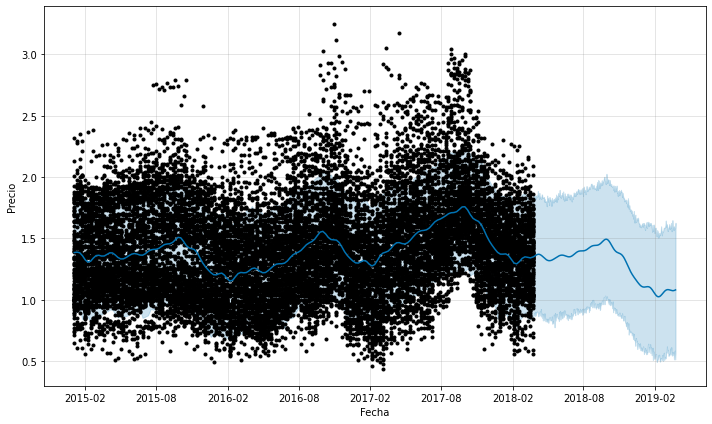

In [ ]:
figure = m.plot(forecast,xlabel='Fecha',ylabel='Precio')

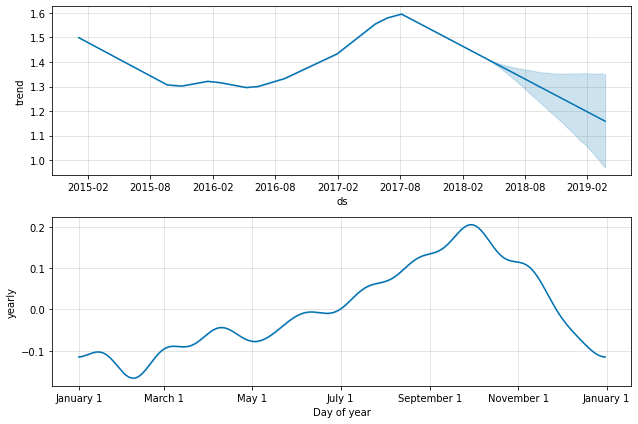

In [ ]:
#Imprimimos los componentes tendencia y estacionalidad
figure = m.plot_components(forecast)

Ahora analizaremos una region en especifico 

In [ ]:
df2 = dataset[dataset['region']=='West']
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


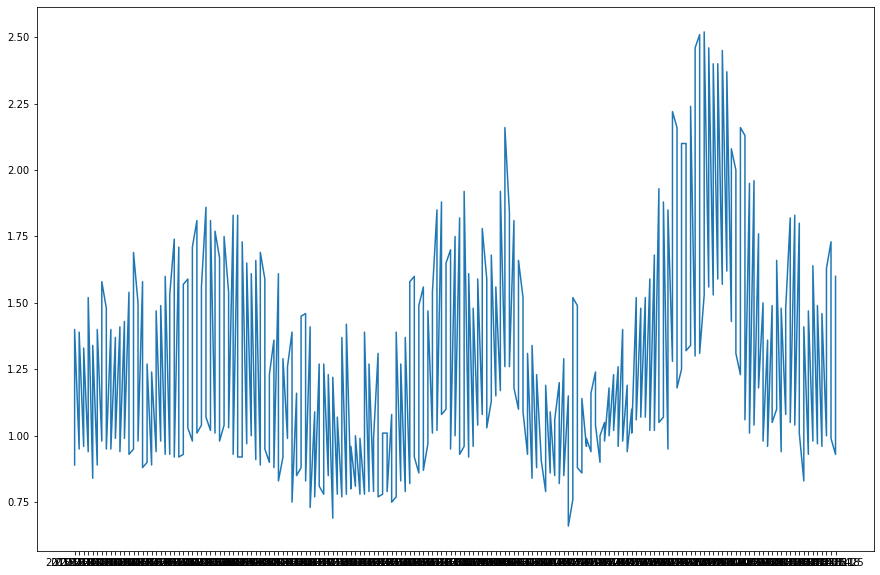

In [ ]:
df2 =  df2.sort_values('Date')
plt.figure(figsize=(15,10))
plt.plot(df2['Date'],df2['AveragePrice'])

In [ ]:
df2 = df2[['Date','AveragePrice']]

#cambiamos el nombre de las columnas
df2.columns = ['ds','y']
df2.head()

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96


In [ ]:
#prediccion

m = Prophet()
m.fit(df2)
#predecimos un año
#x_test
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244744,0.647271,1.480842,1.244744,1.244744,-0.184897,-0.184897,-0.184897,-0.184897,-0.184897,-0.184897,0.0,0.0,0.0,1.059847
1,2015-01-11,1.243901,0.651599,1.504015,1.243901,1.243901,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,0.0,0.0,0.0,1.078595
2,2015-01-18,1.243058,0.653227,1.584027,1.243058,1.243058,-0.156119,-0.156119,-0.156119,-0.156119,-0.156119,-0.156119,0.0,0.0,0.0,1.086939
3,2015-01-25,1.242215,0.629226,1.513342,1.242215,1.242215,-0.168806,-0.168806,-0.168806,-0.168806,-0.168806,-0.168806,0.0,0.0,0.0,1.073409
4,2015-02-01,1.241372,0.594675,1.466256,1.241372,1.241372,-0.191200,-0.191200,-0.191200,-0.191200,-0.191200,-0.191200,0.0,0.0,0.0,1.050172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735704,1.093512,1.906282,1.707618,1.761851,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,0.0,0.0,0.0,1.531304
530,2019-03-22,1.736282,1.117156,1.961122,1.708125,1.762506,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,0.0,0.0,0.0,1.536968
531,2019-03-23,1.736860,1.115621,1.970079,1.708623,1.763160,-0.193661,-0.193661,-0.193661,-0.193661,-0.193661,-0.193661,0.0,0.0,0.0,1.543199
532,2019-03-24,1.737438,1.105505,1.983946,1.709121,1.763815,-0.187548,-0.187548,-0.187548,-0.187548,-0.187548,-0.187548,0.0,0.0,0.0,1.549890


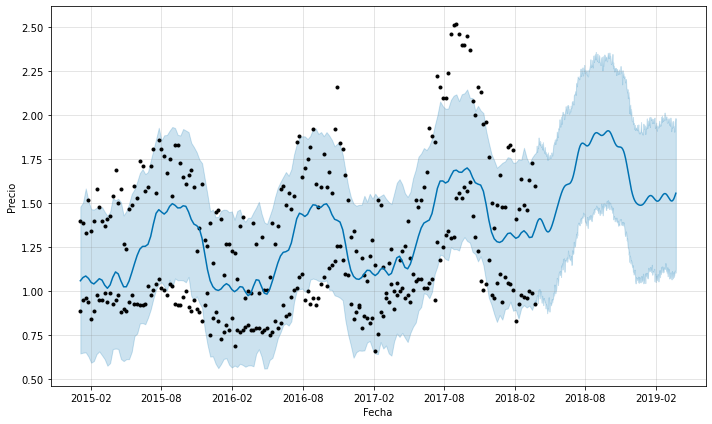

In [ ]:
figure = m.plot(forecast,xlabel='Fecha',ylabel='Precio')

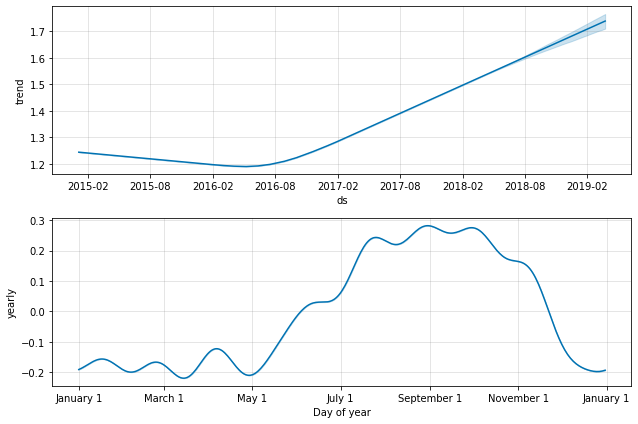

In [ ]:
figure = m.plot_components(forecast)

#Change Points

Vamos a configurar estos puntos de cambio, originalmente prophet agrega 25 puntos al 80% de la base de datos.

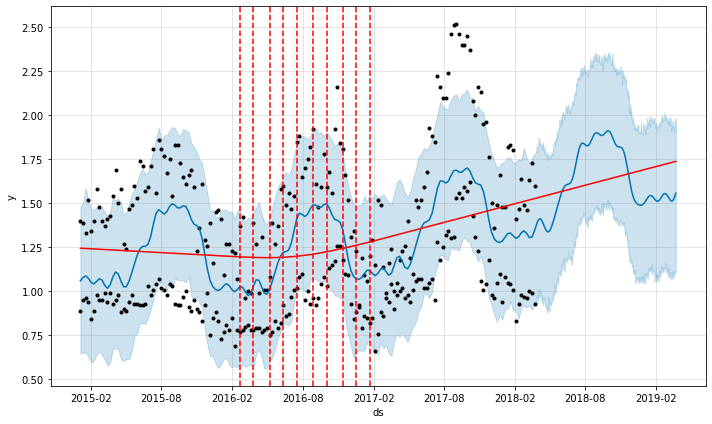

In [ ]:
#Change points
#Prophet detecta los change points y selecciona los principales
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
#conoce los changepoints
m.changepoints

11    2015-02-08
22    2015-03-22
32    2015-04-26
43    2015-05-31
54    2015-07-12
65    2015-08-16
75    2015-09-20
86    2015-11-01
97    2015-12-06
108   2016-01-17
118   2016-02-21
129   2016-03-27
140   2016-05-08
151   2016-06-12
161   2016-07-17
172   2016-08-28
183   2016-10-02
194   2016-11-13
204   2016-12-18
215   2017-01-22
226   2017-03-05
237   2017-04-09
247   2017-05-14
258   2017-06-25
269   2017-07-30
Name: ds, dtype: datetime64[ns]

Tambien prophet te permite visualizar las magnitudes de estos posibles changepoints

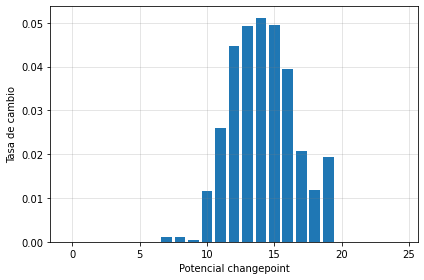

In [ ]:

deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Tasa de cambio')
ax.set_xlabel('Potencial changepoint')
fig.tight_layout()

Podemos cambiar el rango de los range points 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


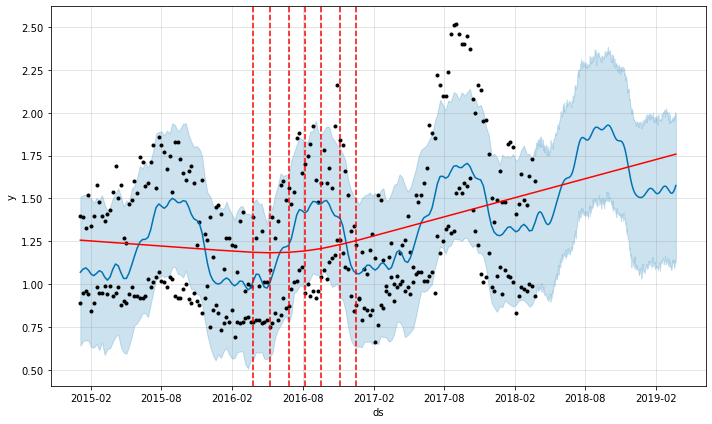

In [ ]:
pro_change= Prophet(changepoint_range=0.95, yearly_seasonality=True)
forecast = pro_change.fit(df2).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


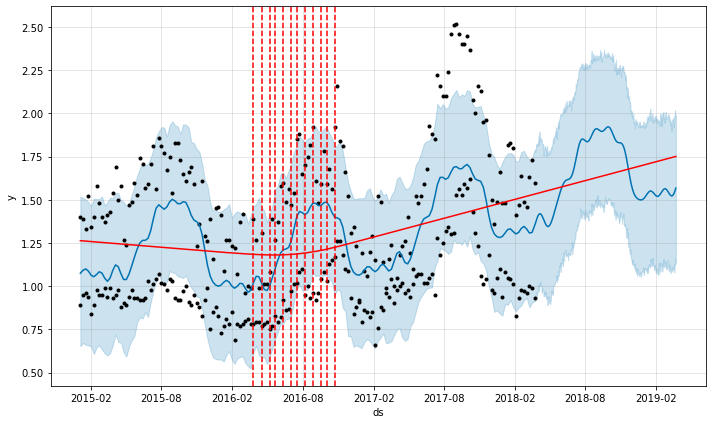

In [ ]:
#o directamente diciendole cuantos puntos
pro_change= Prophet(n_changepoints=50, yearly_seasonality=True)
forecast = pro_change.fit(df2).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          534 non-null    datetime64[ns]
 1   trend                       534 non-null    float64       
 2   yhat_lower                  534 non-null    float64       
 3   yhat_upper                  534 non-null    float64       
 4   trend_lower                 534 non-null    float64       
 5   trend_upper                 534 non-null    float64       
 6   additive_terms              534 non-null    float64       
 7   additive_terms_lower        534 non-null    float64       
 8   additive_terms_upper        534 non-null    float64       
 9   yearly                      534 non-null    float64       
 10  yearly_lower                534 non-null    float64       
 11  yearly_upper                534 non-null    float64       

Prophet te permite ajustar la tendencia en caso de que haya un overfit o un underfit. changepoint_prior_scale ayuda a ajustar la fuerza de la tendencia.

El valor predeterminado para changepoint_prior_scale es 0.05. Disminuya el valor para hacer que la tendencia sea menos flexible. 

Aumente el valor de changepoint_prior_scale para hacer que la tendencia sea más flexible.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


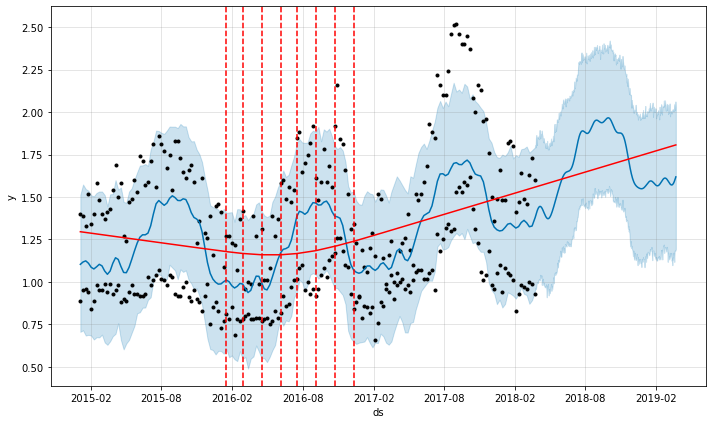

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df2).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Decrementarla para que sea menos flexible

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


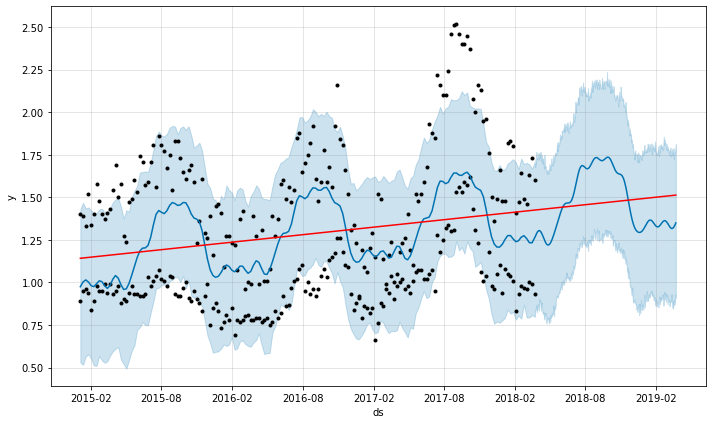

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df2).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# Agregando días festivos :)

In [ ]:
avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


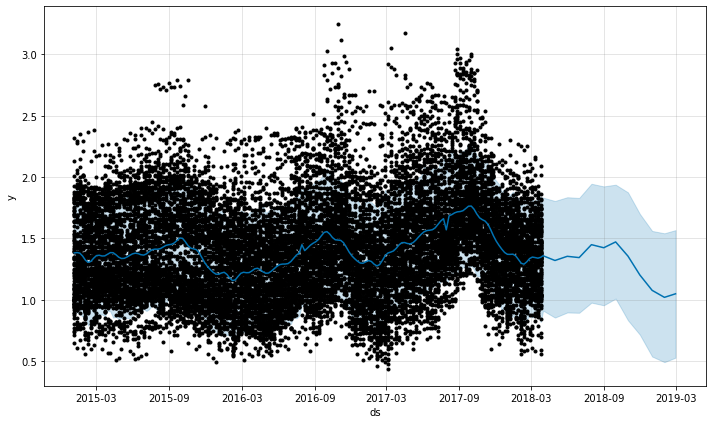

In [ ]:
pro_holiday= Prophet(holidays=avocado_season)
pro_holiday.fit(df1) #utilizamos el dataframe más grande
future_data = pro_holiday.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_holiday.predict(future_data)
pro_holiday.plot(forecast_data);

¡Listo!, ¡felicidades por completar el notebook!